In [6]:
%matplotlib notebook

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def func(x,y):
    return x**2 + y**2

### SGD Optimizer
->  Shows a zigzag path due to lack of momentum

In [8]:
# SGD Optimizer
def optimize_with_sgd(init_point = (4.0, 4.0), learning_rate= 0.1, epochs = 50):
    x = tf.Variable(init_point[0], dtype = tf.float32)
    y = tf.Variable(init_point[1], dtype=tf.float32)
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    x_history , y_history = [], []
    
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss = func(x,y)
        grads = tape.gradient(loss, [x,y])
        optimizer.apply_gradients(zip(grads, [x,y]))
        
        
        x_history.append(x.numpy())
        y_history.append(y.numpy())
    return x_history, y_history


In [9]:
# run sgd

x_sgd, y_sgd = optimize_with_sgd()

<IPython.core.display.Javascript object>


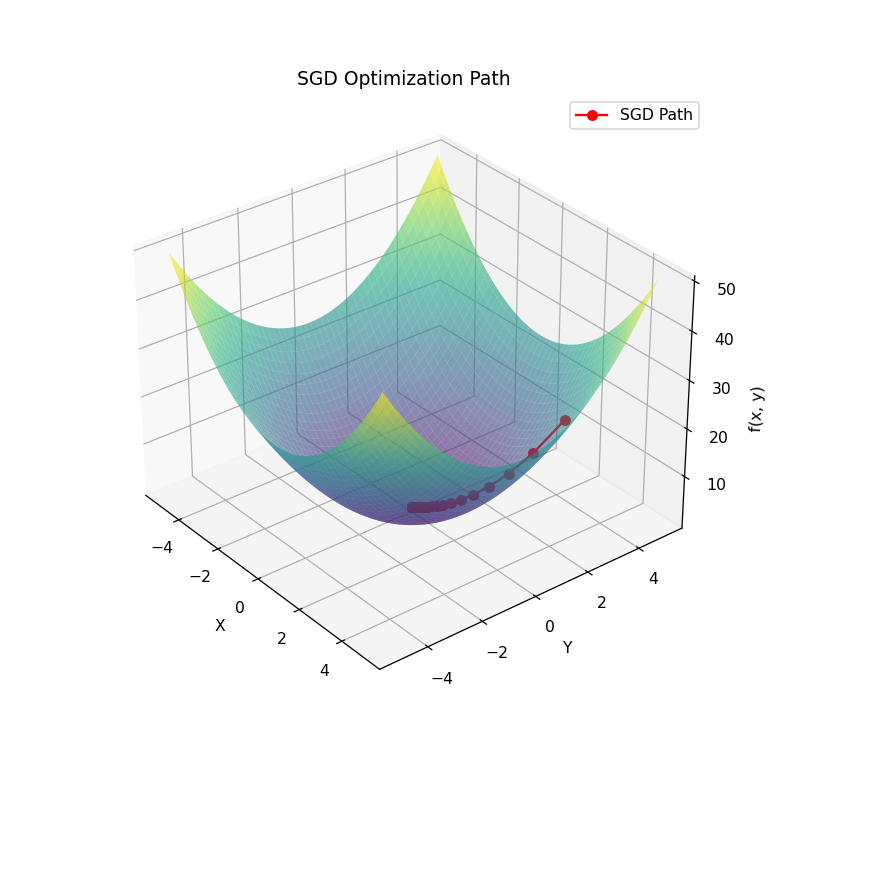

In [12]:
# plot
# Plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.plot(x_sgd, y_sgd, [func(x, y) for x, y in zip(x_sgd, y_sgd)], color='r', marker='o', label='SGD Path')

ax.set_title('SGD Optimization Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()

### Momentum Optimizer
-> Smoothens the zigzag, speeding up convergence

In [11]:
def optimize_with_momentum(init_point=(4.0, 4.0), learning_rate=0.1, momentum=0.9, epochs=50):
    x = tf.Variable(init_point[0], dtype=tf.float32)
    y = tf.Variable(init_point[1], dtype=tf.float32)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

    x_history, y_history = [], []

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss = func(x, y)
        grads = tape.gradient(loss, [x, y])
        optimizer.apply_gradients(zip(grads, [x, y]))

        x_history.append(x.numpy())
        y_history.append(y.numpy())

    return x_history, y_history

In [13]:
# run momentum

x_momentum, y_momentum = optimize_with_momentum()

<IPython.core.display.Javascript object>


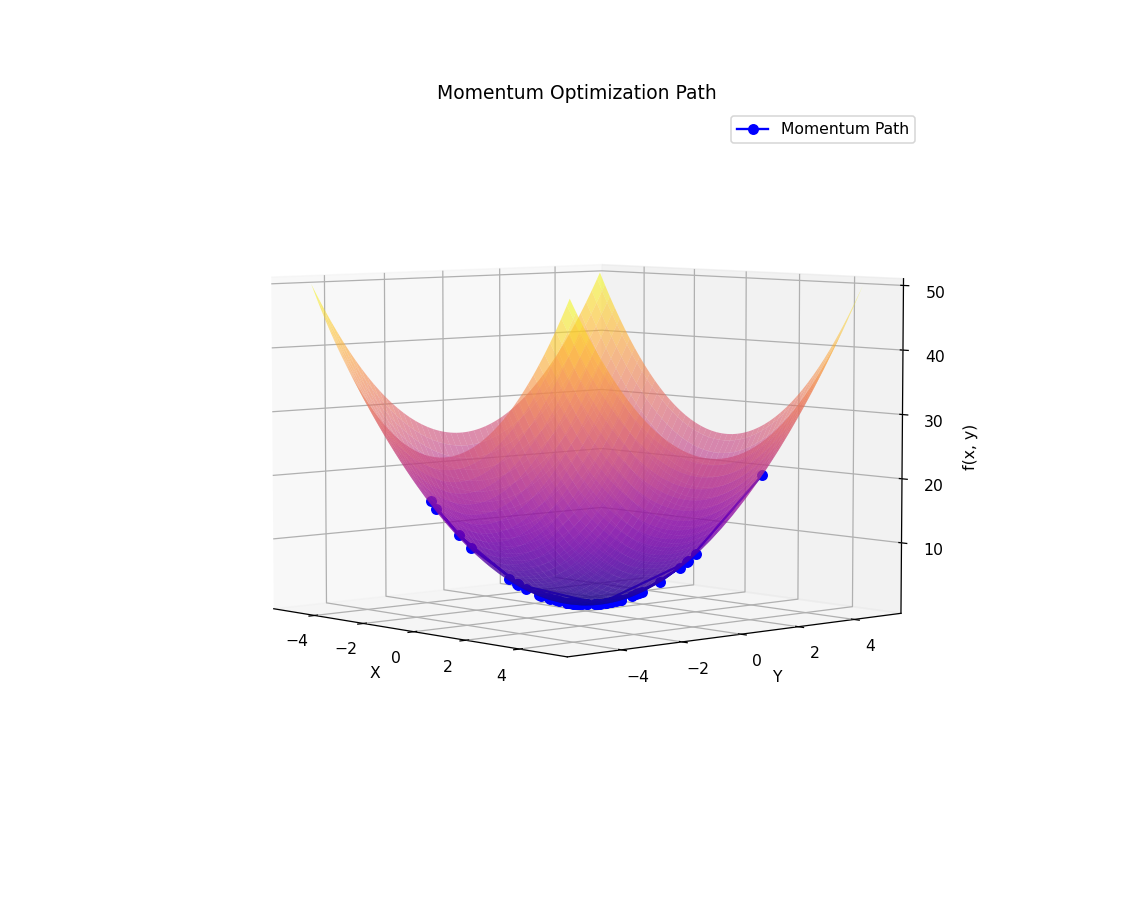

In [14]:
# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.6)
ax.plot(x_momentum, y_momentum, [func(x, y) for x, y in zip(x_momentum, y_momentum)], color='b', marker='o', label='Momentum Path')

ax.set_title('Momentum Optimization Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()

### RMSProp Optimizer
->  Adapts learning rates for faster convergence in certain directions.

In [15]:
# RMSProp Optimizer
def optimize_with_rmsprop(init_point=(4.0, 4.0), learning_rate=0.1, epochs=50):
    x = tf.Variable(init_point[0], dtype=tf.float32)
    y = tf.Variable(init_point[1], dtype=tf.float32)
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    x_history, y_history = [], []

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss = func(x, y)
        grads = tape.gradient(loss, [x, y])
        optimizer.apply_gradients(zip(grads, [x, y]))

        x_history.append(x.numpy())
        y_history.append(y.numpy())

    return x_history, y_history

In [16]:
# Run RMSProp
x_rmsprop, y_rmsprop = optimize_with_rmsprop()

<IPython.core.display.Javascript object>


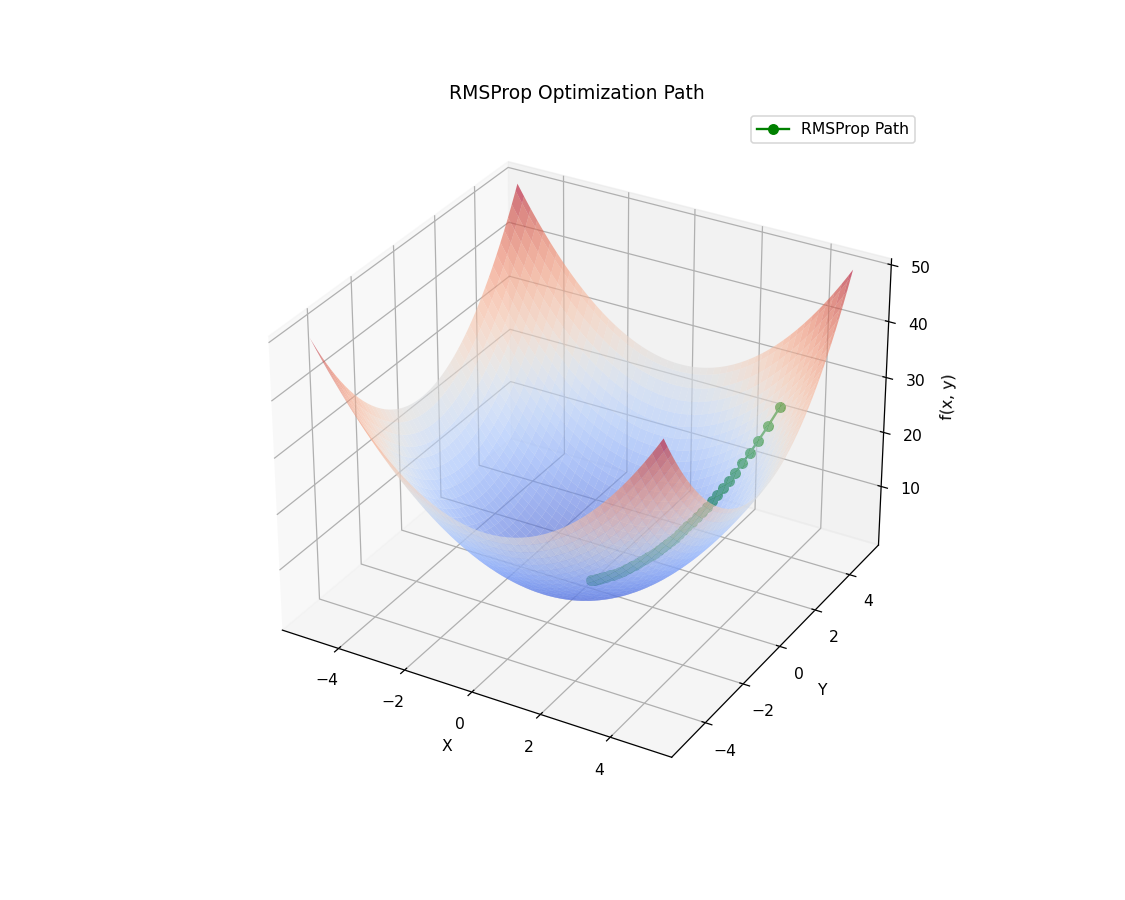

In [17]:
# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.6)
ax.plot(x_rmsprop, y_rmsprop, [func(x, y) for x, y in zip(x_rmsprop, y_rmsprop)], color='g', marker='o', label='RMSProp Path')

ax.set_title('RMSProp Optimization Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()

### Adam Optimizer
-> Combines momentum and adaptive learning rates, leading to efficient convergence.

In [18]:
def optimize_with_adam(init_point=(4.0, 4.0), learning_rate=0.1, epochs=50):
    x = tf.Variable(init_point[0], dtype=tf.float32)
    y = tf.Variable(init_point[1], dtype=tf.float32)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    x_history, y_history = [], []

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss = func(x, y)
        grads = tape.gradient(loss, [x, y])
        optimizer.apply_gradients(zip(grads, [x, y]))

        x_history.append(x.numpy())
        y_history.append(y.numpy())

    return x_history, y_history

In [19]:
x_adam , y_adam = optimize_with_adam()

ERROR! Session/line number was not unique in database. History logging moved to new session 144


<IPython.core.display.Javascript object>


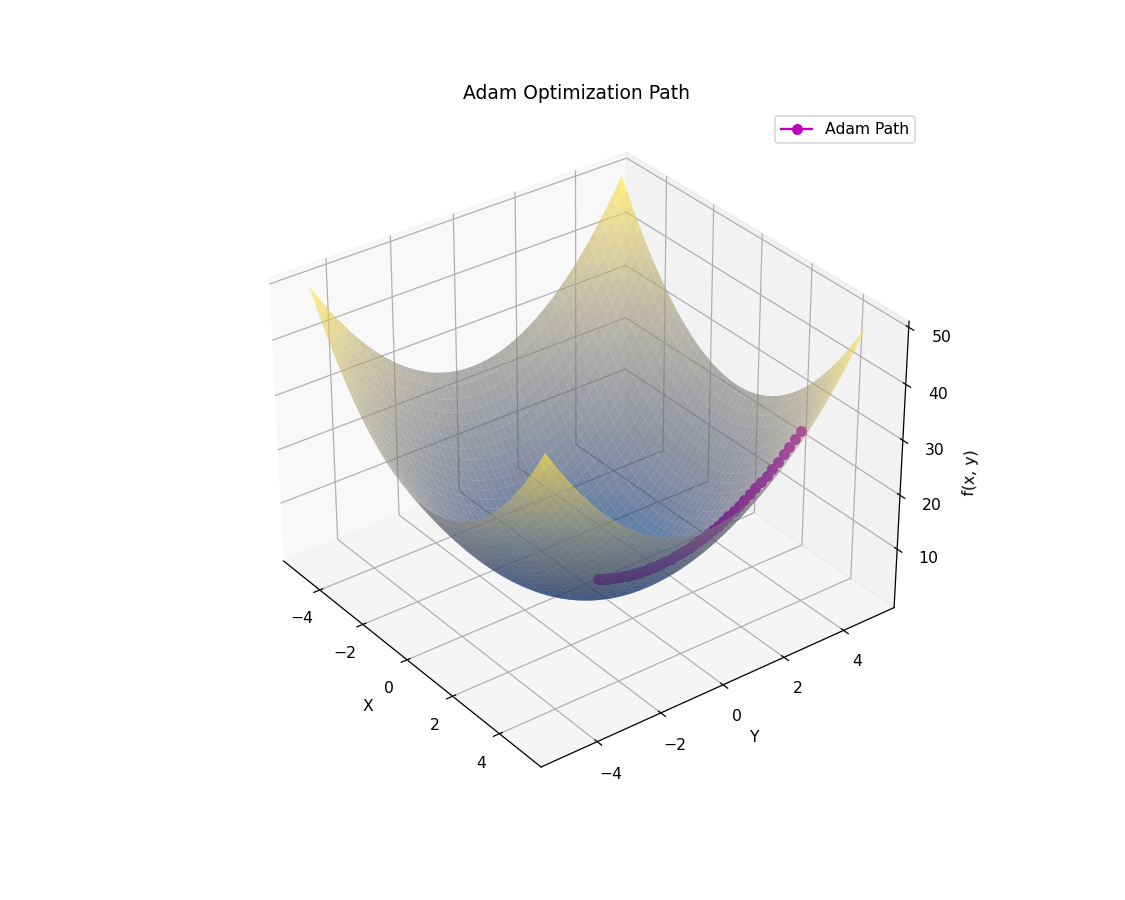

In [20]:
# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='cividis', alpha=0.6)
ax.plot(x_adam, y_adam, [func(x, y) for x, y in zip(x_adam, y_adam)], color='m', marker='o', label='Adam Path')

ax.set_title('Adam Optimization Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()